In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
# read data
def read_data(data):
    data=pd.read_csv(data)
    return data

In [ ]:
#train dataset
df=read_data("/content/sample_data/dataset.csv")
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [ ]:
# shape of training and testing data
print("Training data shape:\n",train.shape)

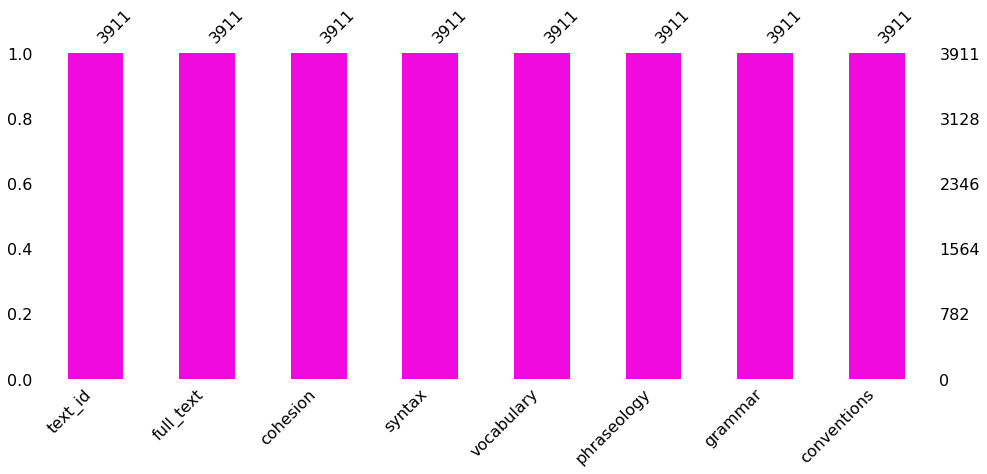

In [ ]:
#visualize missing data in training data
import missingno as msno
msno.bar(train,color='#F10AE0',figsize=(16,6),fontsize=16,sort='ascending')

### There is no missing data(null) is present in the training dataset

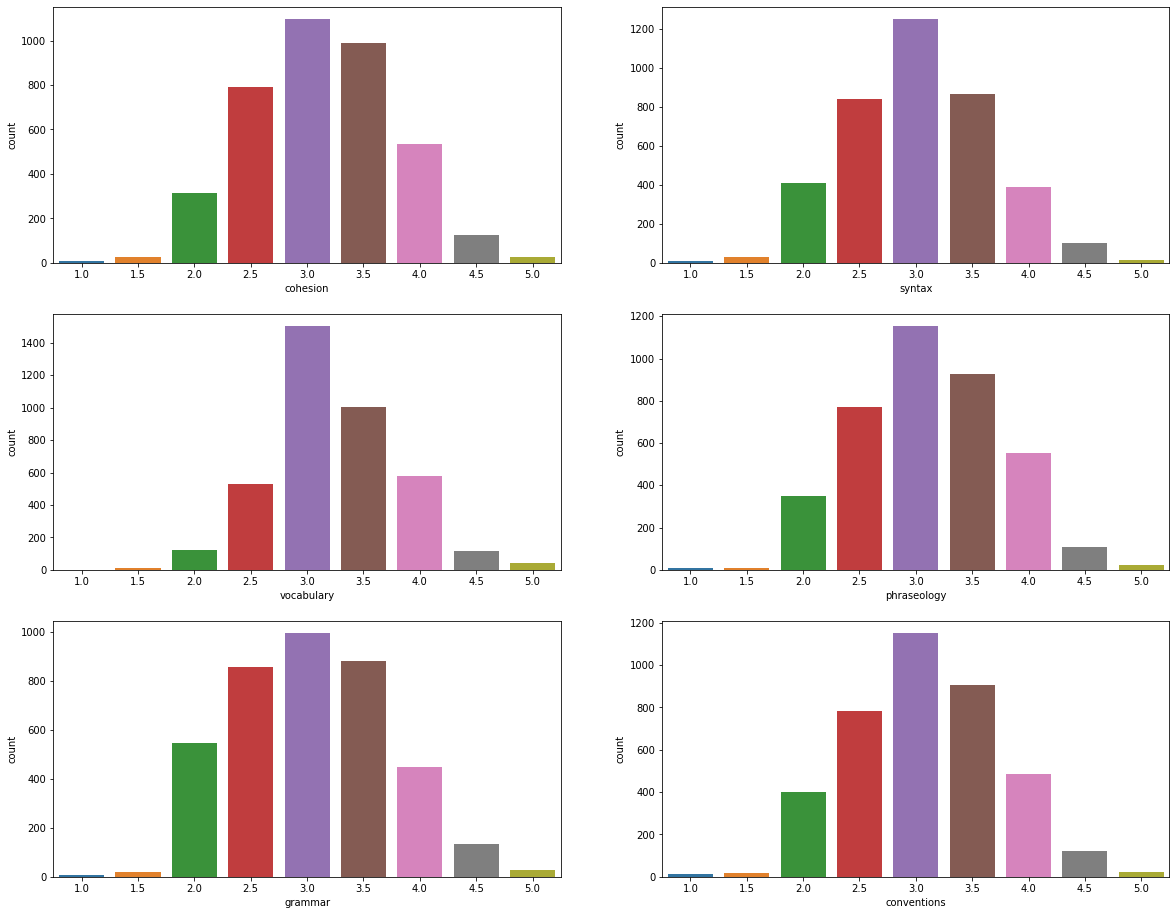

In [ ]:
# Countplot for all six analytic measures: cohesion, syntax, vocabulary, phraseology, grammar,conventions
cols=['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
fig=plt.figure(figsize=(20,16))
for i,col in enumerate(cols):
    fig.add_subplot(3,2,i+1)
    sns.countplot(x=col,data=train)
plt.show()


### Maximum text got the analytical score of 3 across all 6 six measures
### In some of the analytical measures data looks like normally distrubuted as well.

In [ ]:
len(train['full_text'][0].split())

261

In [ ]:
# add one more column text_length to the dataframe.
train['text_length']=train['full_text'].apply(lambda x: len(x.split()))

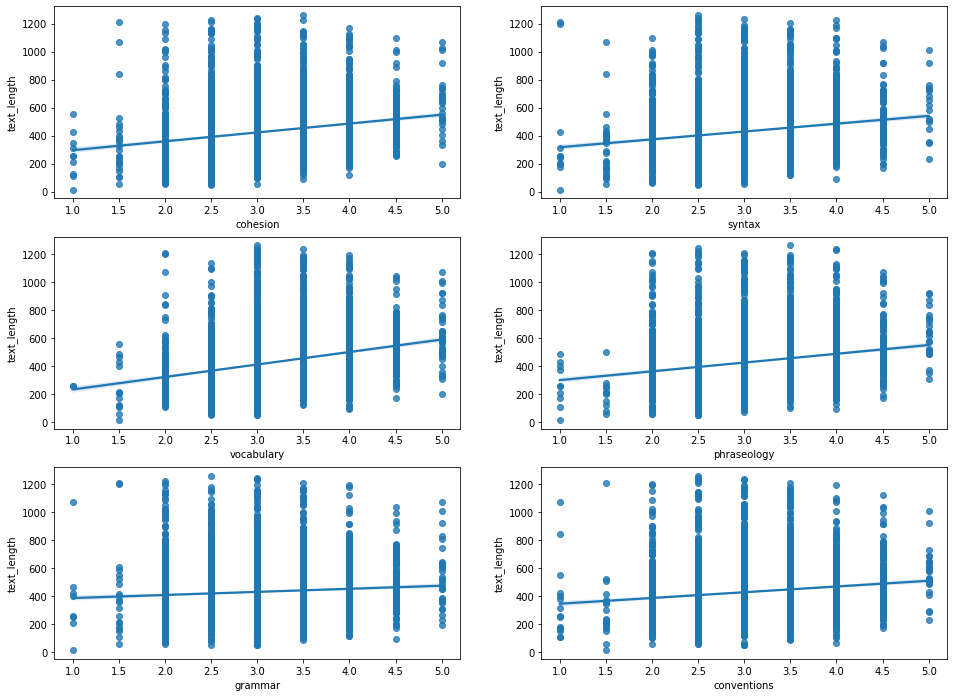

In [ ]:
cols=['cohesion','syntax','vocabulary','phraseology','grammar','conventions']
fig=plt.figure(figsize=(16,12))
for i,col in enumerate(cols):
    fig.add_subplot(3,2,i+1)
    sns.regplot(x=col,y='text_length',data=train)
plt.show()

### Regression plot is clearly showing that As the length of text is increasing so the analytical scores are. It means there is some correlation between the length of the text and analytical scores

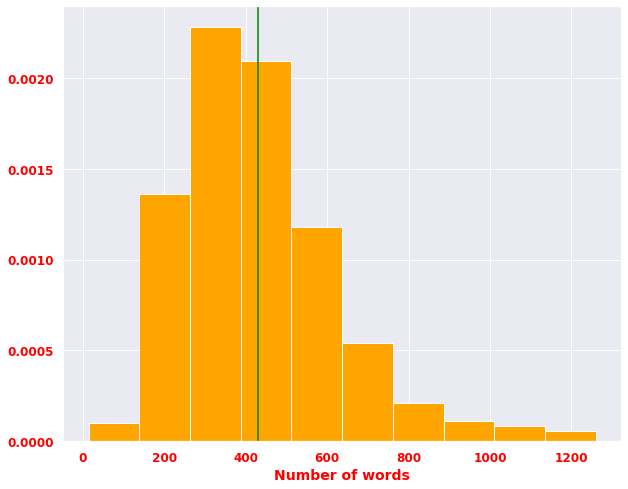

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook')
average_length=sum(train['text_length'])/len(train)
plt.figure(figsize=(10,8))
plt.hist(train['text_length'],density=True,color='orange')
plt.axvline(x=average_length,ymin=0,ymax=1200,color='green')
plt.xlabel("Number of words",fontsize=14,fontweight='bold',color='red')
plt.xticks(fontsize=12,fontweight='bold',color='red')
plt.yticks(fontsize=12,fontweight='bold',color='red')
plt.show()

### Average number of words in the text is nearly 430

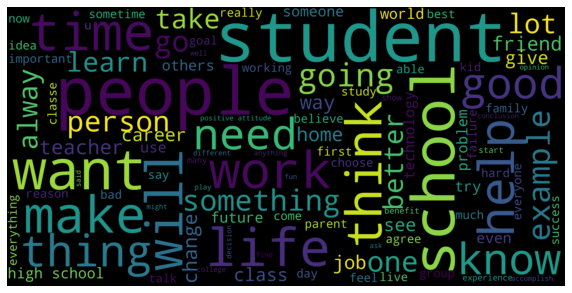

In [ ]:
from wordcloud import WordCloud
wordCloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=400
).generate(" ".join(train["full_text"]))

plt.figure(figsize=(10,10))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()